In [161]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
from __future__ import division
import numpy as np
from setup import *
from OrbitalMotion import numerical_orbital_evolution, analytical_orbital_evolution
c,G,Msolar,AU, pc = univeral_constants()

In [163]:
#Choose system parameters 

#---Inner Binary---
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
a1 = semi_major_axis(m0+m1,f1)
e1 = 0.5 #eccentricity
g1 = np.pi/4
J1 = angular_momentum(m0,m1,e1,a1)#angular momentum. Eq. 12 of Randal

#---Outer Binary
beta=5
a2 = beta * a1
m2 = 10*Msolar
e2 = 0.6

#---Shared---
I = 60 * np.pi/180.0 #Inclination
nmodes = 20 #number of modes to sum over for GW
iota = 20 * np.pi/180  #angle of L vector w.r.t observer LOS 
D = 1e6 * pc #distance from source to observer 1Mpc


#---Integration settings
Tint = 0.01
fs = 1e-1

#---Info for user
status(fs, Tint)



Sampling frequency =  0.1  Hz for an observation period of  0.01  years
Total number of integration steps is  31536.0
Frequency range is:  3.1709791983764586e-06  -  0.05  Hz


In [185]:
#Training set
output = numerical_orbital_evolution(m0,m1,m2,a1,e1,g1,J1,e2,a2,I,4e-4,Tint)
numerical_motion = output[0]
constants = output[1]

K =  1.1565942657526629e+24
C =  -6.752505469155556e+23
lambda =  2.3869282539699428e+16 6.67e-11 300000000.0 6e+31 6e+31
I =  1.0471975511965976
J2 =  7.182511894390675e+46
Numerical orbital evolution has completed with fs =  0.0004  Hz and Tobs =  0.01  years


In [188]:
#Analytical solution
analytical_motion = analytical_orbital_evolution(numerical_motion,Tint, fs,constants)

[     0.   2500.   5000.   7500.  10000.  12500.  15000.  17500.  20000.
  22500.  25000.  27500.  30000.  32500.  35000.  37500.  40000.  42500.
  45000.  47500.  50000.  52500.  55000.  57500.  60000.  62500.  65000.
  67500.  70000.  72500.  75000.  77500.  80000.  82500.  85000.  87500.
  90000.  92500.  95000.  97500. 100000. 102500. 105000. 107500. 110000.
 112500. 115000. 117500. 120000. 122500. 125000. 127500. 130000. 132500.
 135000. 137500. 140000. 142500. 145000. 147500. 150000. 152500. 155000.
 157500. 160000. 162500. 165000. 167500. 170000. 172500. 175000. 177500.
 180000. 182500. 185000. 187500. 190000. 192500. 195000. 197500. 200000.
 202500. 205000. 207500. 210000. 212500. 215000. 217500. 220000. 222500.
 225000. 227500. 230000. 232500. 235000. 237500. 240000. 242500. 245000.
 247500. 250000. 252500. 255000. 257500. 260000. 262500. 265000. 267500.
 270000. 272500. 275000. 277500. 280000. 282500. 285000. 287500. 290000.
 292500. 295000. 297500. 300000. 302500. 305000. 30

NameError: name 'sys' is not defined

In [166]:
#Numerical solution
output = numerical_orbital_evolution(m0,m1,m2,a1,e1,g1,J1,e2,a2,I,fs,Tint)
numerical_motion = output[0]

K =  1.1565942657526629e+24
C =  -6.752505469155556e+23
lambda =  2.3869282539699428e+16 6.67e-11 300000000.0 6e+31 6e+31
I =  1.0471975511965976
J2 =  7.182511894390675e+46
Numerical orbital evolution has completed with fs =  0.1  Hz and Tobs =  0.01  years
2


[0.78539816 0.78539832 0.78539848 ... 0.79042277 0.79042293 0.79042309]


TypeError: tuple indices must be integers or slices, not tuple

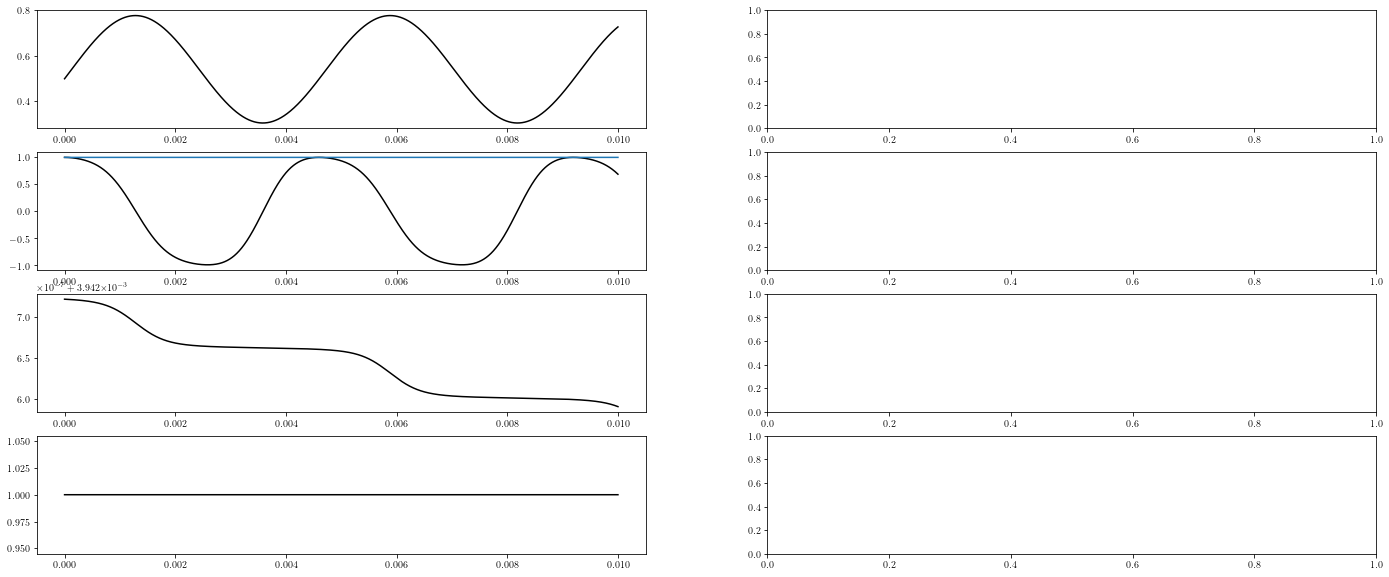

In [168]:
%matplotlib inline
from plot import *
#temp(numerical_motion)
plot_compare_motion(analytical_motion,numerical_motion)
#plot_motion(numerical_motion)
#plot_motion(analytical_motion)


In [ ]:
import GravRadiation as GR
constants = np.array([m0+m1, nmodes,iota,m0*m1/(m0+m1),D])
waveformNR = GR.Gwaves(numerical_motion, constants)
waveformAN = GR.Gwaves(analytical_motion, constants)
plot_GW(waveformNR,f1)
plot_GW(waveformAN,f1)

In [ ]:
f,h1,h2, S = GR.overlap(waveformNR,waveformAN)
plot_GW_frequency(f,h1,h2, S)

### 